In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
data = pd.read_csv("data/drill_final.csv")

In [3]:
data.head()

,d,f,n,Vc,Mz,Fz,logM,logFz,logd,logf,logVc
0,4,0.06,450,5.65,0.326572,243.497025,-0.486021,2.386494,0.60206,-1.221849,0.752422
1,4,0.06,500,6.28,0.354396,244.710706,-0.450512,2.388653,0.60206,-1.221849,0.798180
2,4,0.06,550,6.91,0.355931,244.605716,-0.448635,2.388467,0.60206,-1.221849,0.839573
3,4,0.06,600,7.54,0.317263,240.793587,-0.498581,2.381645,0.60206,-1.221849,0.877361
4,4,0.07,450,5.65,0.449351,270.275328,-0.347414,2.431806,0.60206,-1.154902,0.752422


In [4]:
data.columns

Index(['d', 'f', 'n', 'Vc', 'Mz', 'Fz', 'logM', 'logFz', 'logd', 'logf',
       'logVc'],
      dtype='object')

In [5]:
data = data.loc[:, ~data.columns.str.match('Unnamed')]
data

,d,f,n,Vc,Mz,Fz,logM,logFz,logd,logf,logVc
0,4,0.06,450,5.65,0.326572,243.497025,-0.486021,2.386494,0.602060,-1.221849,0.752422
1,4,0.06,500,6.28,0.354396,244.710706,-0.450512,2.388653,0.602060,-1.221849,0.798180
2,4,0.06,550,6.91,0.355931,244.605716,-0.448635,2.388467,0.602060,-1.221849,0.839573
3,4,0.06,600,7.54,0.317263,240.793587,-0.498581,2.381645,0.602060,-1.221849,0.877361
4,4,0.07,450,5.65,0.449351,270.275328,-0.347414,2.431806,0.602060,-1.154902,0.752422
5,4,0.07,500,6.28,0.398579,272.528516,-0.399485,2.435412,0.602060,-1.154902,0.798180
6,4,0.07,550,6.91,0.447603,269.186461,-0.349107,2.430053,0.602060,-1.154902,0.839573
7,4,0.07,600,7.54,0.464851,268.950613,-0.332686,2.429673,0.602060,-1.154902,0.877361
8,4,0.08,450,5.65,0.536871,294.615508,-0.270130,2.469256,0.602060,-1.096910,0.752422
9,4,0.08,500,6.28,0.388413,300.707193,-0.410706,2.478144,0.602060,-1.096910,0.798180


## Simple linear regression 

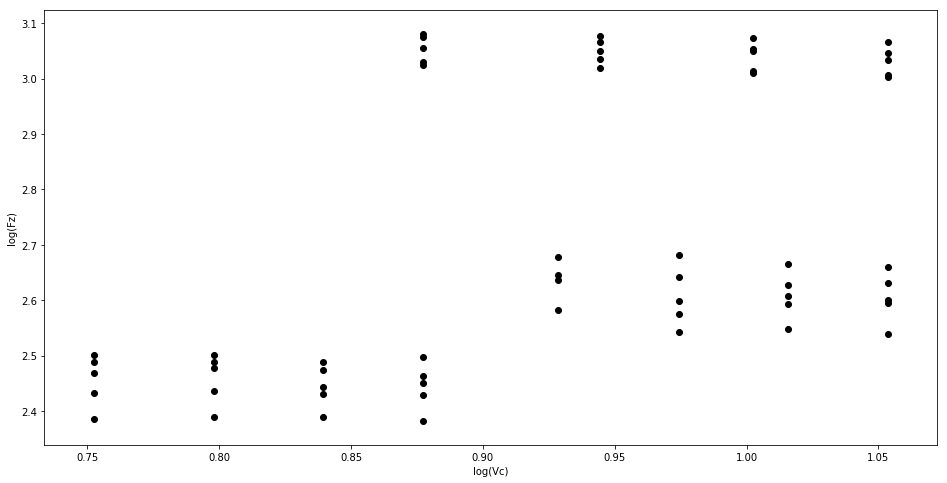

In [14]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['logVc'],
    data['logFz'],
    c='black'
)
plt.xlabel("log(Vc)")
plt.ylabel("log(Fz)")
plt.show()

In [19]:
X = data['logVc'].values.reshape(-1,1)
y = data['logFz'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

1.3035173807264158
1.4966105537096488
The linear model is: Y = 1.4966 + 1.3035X


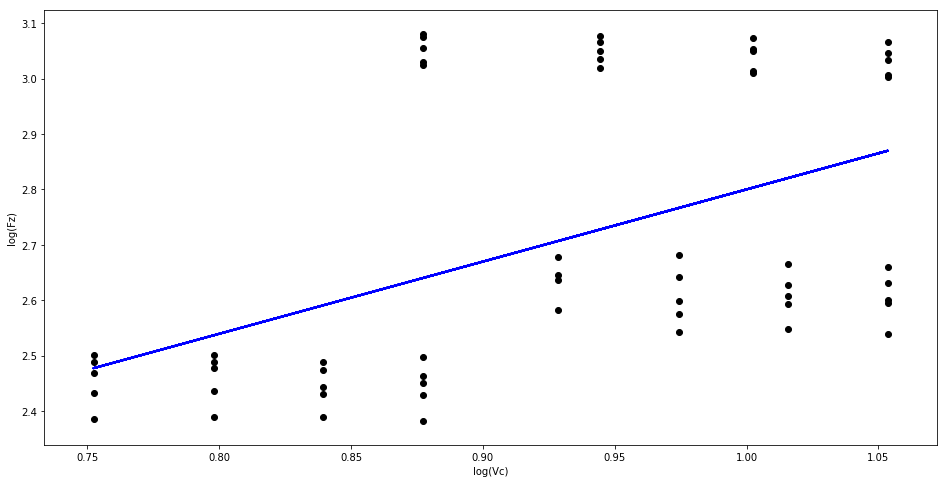

In [21]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['logVc'],
    data['logFz'],
    c='black'
)
plt.plot(
    data['logVc'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("log(Vc)")
plt.ylabel("log(Fz)")
plt.show()

In [22]:
X = data['logVc']
y = data['logFz']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  logFz   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     17.93
Date:                Wed, 29 May 2019   Prob (F-statistic):           8.45e-05
Time:                        10:13:04   Log-Likelihood:                 5.0738
No. Observations:                  59   AIC:                            -6.148
Df Residuals:                      57   BIC:                            -1.992
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4966      0.287      5.220      0.0

## Multiple linear regression 

In [24]:
Xs = data.drop(['logFz', 'logM'], axis=1)
y = data['logFz'].values.reshape(-1,1)
y2 = data['logM'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)
reg2 = LinearRegression()
reg2.fit(Xs, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
print("log(Fz)")
print(reg.coef_)
print(reg.intercept_)
print("log(Mz)")
print(reg2.coef_)
print(reg2.intercept_)

log(Fz)
[[ 9.23248811e-02 -6.96479227e+00 -1.85343074e-04  3.61349516e-03
  -4.99630421e-03  4.14280747e-04 -5.71140863e-01  1.54496581e+00
   8.59404615e-02]]
[4.5760662]
log(Mz)
[[ 2.56146741e-01 -1.06657808e+01  3.20704520e-04 -1.28323688e-02
   2.76288223e-01 -5.68032969e-04 -8.35740217e-01  2.59368673e+00
  -2.42126555e-01]]
[2.98776335]


In [26]:
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

The linear model is: Y = 4.5761 + 0.092325*TV + -6.9648*radio + -0.00018534*newspaper


In [27]:
print("Fz", reg.score(Xs, y))
print("Mz", reg2.score(Xs, y2))

Fz 0.9980200539459769
Mz 0.9929479019608543


In [29]:
X = np.column_stack((data['logd'], data['logf'], data['logVc']))
y = data['logFz']
y2 = data['logM']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  logFz   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     302.8
Date:                Wed, 29 May 2019   Prob (F-statistic):           3.72e-34
Time:                        10:15:18   Log-Likelihood:                 81.470
No. Observations:                  59   AIC:                            -154.9
Df Residuals:                      55   BIC:                            -146.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2945      0.149     15.431      0.0